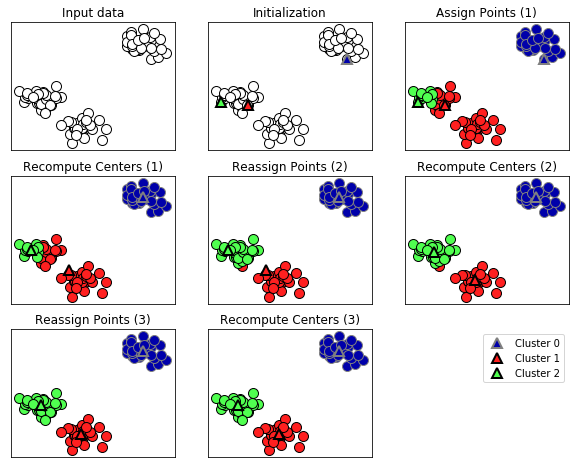

In [1]:
%matplotlib inline
import mglearn
import numpy as np
import matplotlib.pyplot as plt

mglearn.plots.plot_kmeans_algorithm()

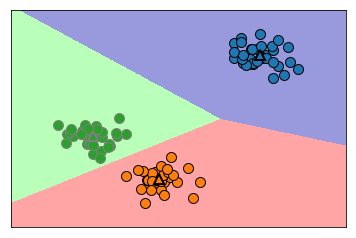

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y=make_blobs(random_state=1)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))

Принадлежность к кластерам:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [5]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


Text(0,0.5,'Feature 1')

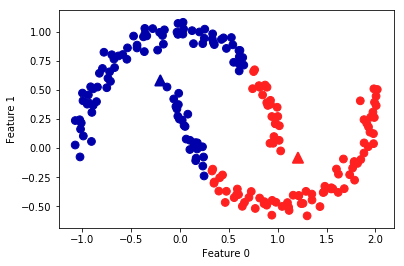

In [12]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200,noise=0.05, random_state=0)
kmeans= KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)],s=100, linewidth = 2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [16]:
# comparison of PCA, NMF and k-means
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA

people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf=NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca=PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans=KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_test)

X_reconstructed_pca=pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf=np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans=kmeans.cluster_centers_[kmeans.predict(X_test)]

KeyboardInterrupt: 

Принадлежность к кластерам: 
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


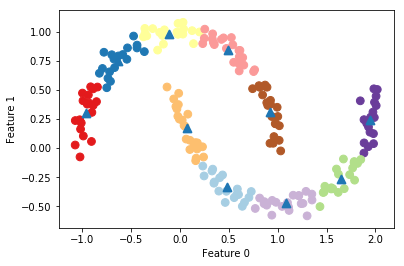

In [23]:
#использование большого числа кластеров для выявления дисперсии в сложном наборе данных
X,y = make_moons(n_samples=200,noise=0.05, random_state=0)
kmeans= KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred,  s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', s=60, cmap='Paired',linewidth = 2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print('Принадлежность к кластерам: \n{}'.format(y_pred))

In [36]:
distance_features=kmeans.transform(X)

print('Форма характеристик-расстояний:{}'.format(distance_features.shape))
print('Характеристики-расстояний:\n{}'.format(distance_features))

Форма характеристик-расстояний:(200, 10)
Характеристики-расстояний:
[[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]
